## Libraries and Pathes

In [173]:
import pandas as pd
import sys
from pathlib import Path
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# adiciona a pasta src ao sys.path
sys.path.append(str(Path.cwd().parent.parent / "src")) # Necessário contar quantos niveis subir nas pastas, incluir 1 .parent para cada nivel.

# Importa o script paths de utils para geracão de caminhos absolutos
from utils.paths import resolve_env_path, PROJECT_ROOT
from utils.text_processing import normalize

print("Root:", PROJECT_ROOT)


Root: /home/renan/academico/series_temporais


## Environment variables

In [2]:
# Caminhos para os dados
ARRIVALS_PATH = resolve_env_path("ARRIVALS_PATH")
ARRIVALS_RAW_PATH = ARRIVALS_PATH / "raw"

# Caminhos de variaveis de configuracao
DATAFRAME_ENCODING = os.getenv("DATAFRAME_ENCODING")

# Caminhos para arquivos
ARRIVALS_SCHEMA_PATH = resolve_env_path("ARRIVALS_SCHEMA_PATH")
ARRIVALS_COLUMN_SYNONYMS_PATH = resolve_env_path("ARRIVALS_COLUMN_SYNONYMS_PATH")

## Importing data

Read possible column names for historical data on international arrivals

In [3]:
with open(ARRIVALS_COLUMN_SYNONYMS_PATH, 'r') as f:
    synonyms = json.load(f)

In [4]:
synonyms

{'continente': 'continent',
 'cod_continente': 'continent_id',
 'pais': 'country',
 'cod_pais': 'country_id',
 'uf': 'state',
 'cod_uf': 'state_id',
 'via': 'entry_route',
 'cod_via': 'entry_route_id',
 'ano': 'year',
 'mes': 'month',
 'cod_mes': 'month_id',
 'chegadas': 'arrivals',
 'ordem_continente': 'continent_id',
 'ordem_pais': 'country_id',
 'ordem_uf': 'state_id',
 'via_de_acesso': 'entry_route',
 'ordem_via_de_acesso': 'entry_route_id',
 'ordem_mes': 'month_id'}

Reading arrivals data:
1. Iterate over csv files in the arrivals raw data folder
2. read each dataframe
3. normalize column names
4. rename each column to the desired name according to the canonical set


In [5]:
csv_files = ARRIVALS_RAW_PATH.glob("*.csv")

dfs = list()
for i, file in enumerate(csv_files):
    # Read dataframe
    data = pd.read_csv(file, encoding=DATAFRAME_ENCODING, sep=";")

    # Normalize column names
    data.columns = [normalize(col) for col in data.columns]

    # Rename each column to canonical set
    data = data.rename(columns=synonyms)
    data["file_index"] = f"File {i}"
    dfs.append(data)

df = pd.concat(dfs, ignore_index=True)



In [7]:
df.head()

,continent,continent_id,country,country_id,state,state_id,entry_route,entry_route_id,year,month,month_id,arrivals,file_index
0,África,1,África do Sul,2,Acre,1,Terrestre,2,2015,janeiro,1,2.0,File 0
1,África,1,Angola,6,Acre,1,Terrestre,2,2015,janeiro,1,0.0,File 0
2,África,1,Cabo Verde,35,Acre,1,Terrestre,2,2015,janeiro,1,0.0,File 0
3,África,1,Egito,60,Acre,1,Terrestre,2,2015,janeiro,1,0.0,File 0
4,África,1,Gana,77,Acre,1,Terrestre,2,2015,janeiro,1,0.0,File 0


## Data Exploration

There are no null variables.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762572 entries, 0 to 762571
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   continent       762572 non-null  object 
 1   continent_id    762572 non-null  int64  
 2   country         762572 non-null  object 
 3   country_id      762572 non-null  int64  
 4   state           762572 non-null  object 
 5   state_id        762572 non-null  int64  
 6   entry_route     762572 non-null  object 
 7   entry_route_id  762572 non-null  int64  
 8   year            762572 non-null  int64  
 9   month           762572 non-null  object 
 10  month_id        762572 non-null  int64  
 11  arrivals        755660 non-null  float64
 12  file_index      762572 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 75.6+ MB


### Continent and country data quality evaluation
#### Continent

In [9]:
df["continent"].unique()

array(['África', 'América Central e Caribe', 'América do Norte',
       'América do Sul', 'Ásia', 'Europa', 'Oceania',
       'Continente não especificado'], dtype=object)

In [12]:
no_continent_df = df[df["continent"] == "Continente não especificado"]
no_continent_df

,continent,continent_id,country,country_id,state,state_id,entry_route,entry_route_id,year,month,month_id,arrivals,file_index
92,Continente não especificado,8,Países não especificados,999,Acre,1,Terrestre,2,2015,janeiro,1,0.0,File 0
185,Continente não especificado,8,Países não especificados,999,Acre,1,Terrestre,2,2015,fevereiro,2,0.0,File 0
278,Continente não especificado,8,Países não especificados,999,Acre,1,Terrestre,2,2015,março,3,0.0,File 0
371,Continente não especificado,8,Países não especificados,999,Acre,1,Terrestre,2,2015,abril,4,0.0,File 0
464,Continente não especificado,8,Países não especificados,999,Acre,1,Terrestre,2,2015,maio,5,0.0,File 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
762255,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2018,agosto,8,0.0,File 24
762256,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2018,setembro,9,0.0,File 24
762257,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2018,outubro,10,0.0,File 24
762258,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2018,novembro,11,0.0,File 24


In [13]:
no_continent_df["country"].unique()

array(['Países não especificados'], dtype=object)

There is no NaN data, but there are specific labels to deal with data there has missing values for country, which lead to missing values for continent as well. We should evaluate how many arrivals does that represent, in terms of the total arrivals.

In [20]:
(df.groupby("continent")["arrivals"].sum() / df["arrivals"].sum()).sort_values(ascending=False)

continent
América do Sul                 0.500297
Europa                         0.289611
América do Norte               0.139763
Ásia                           0.040778
África                         0.012940
Oceania                        0.008233
América Central e Caribe       0.007844
Continente não especificado    0.000535
Name: arrivals, dtype: float64

Missing continent data represent approximately 0.05%, so it should be fine to ignore it, if we choose to make a hierarchical model by continent.

#### Countries

In [23]:
df["country"].unique()

array(['África do Sul', 'Angola', 'Cabo Verde', 'Egito', 'Gana',
       'Marrocos', 'Moçambique', 'Nigéria', 'Quênia', 'Tunísia',
       'Outros países', 'Costa Rica', 'Cuba', 'El Salvador', 'Guatemala',
       'Haiti', 'Honduras', 'Nicarágua', 'Panamá', 'República Dominicana',
       'Trinidad e Tobago', 'Canadá', 'Estados Unidos', 'México',
       'Argentina', 'Bolívia', 'Chile', 'Colômbia', 'Equador', 'Guiana',
       'Guiana Francesa', 'Paraguai', 'Peru', 'Suriname', 'Uruguai',
       'Venezuela', 'Arábia Saudita', 'Bangladesh', 'China',
       'China, Hong Kong', 'Cingapura', 'Filipinas', 'Índia', 'Indonésia',
       'Irã', 'Israel', 'Japão', 'Líbano', 'Malásia', 'Paquistão',
       'República da Coreia', 'Síria', 'Tailândia', 'Taiwan', 'Alemanha',
       'Áustria', 'Bélgica', 'Bulgária', 'Croácia', 'Dinamarca',
       'Eslováquia', 'Eslovênia', 'Espanha', 'Estônia', 'Finlândia',
       'França', 'Grécia', 'Holanda', 'Hungria', 'Irlanda', 'Itália',
       'Letônia', 'Lituânia', 'L

Missing data categories:
* Outros países
* Países não especificados
* Outros países da Europa
* Outros países da Ásia
* Outros países da África
* Outros países da Oceania

Missing data categories seem to be consistent over years.

In [ ]:
missing_country_cats = [
    "Outros países",
    "Países não especificados",
    "Outros países da Europa",
    "Outros países da Ásia",
    "Outros países da África",
    "Outros países da Oceania"
    ]

In [27]:
df[df["country"].isin(missing_country_cats)][["continent", "country"]].value_counts()

continent                    country                 
Ásia                         Outros países               14043
África                       Outros países               11725
Europa                       Outros países               11455
América Central e Caribe     Outros países               10890
Continente não especificado  Países não especificados    10139
Oceania                      Outros países                7548
África                       Outros países da África      1051
Ásia                         Outros países da Ásia         884
Europa                       Outros países da Europa       832
Oceania                      Outros países da Oceania       63
Name: count, dtype: int64

The rule for categorizing missing information seem to have changed at some point. Some rows have only "Outros países" as a tag, and others have appended continent information, like "Outros países da África", which is redundant, since there exists a continent column.

It is not a big deal, however, this could be a problem for a hierarchical model using country information. It seems to be more reasonable to work with continent data, which is generally available.

In [36]:
country_arrivals_percentage = df.groupby("country")["arrivals"].sum() / df["arrivals"].sum()

In [39]:
country_arrivals_percentage.loc[missing_country_cats]

country
Outros países               1.650707e-02
Países não especificados    5.345204e-04
Outros países da Europa     4.806299e-05
Outros países da Ásia       1.048477e-04
Outros países da África     7.944709e-05
Outros países da Oceania    8.971342e-07
Name: arrivals, dtype: float64

In [41]:
country_arrivals_percentage.loc[missing_country_cats].sum()

np.float64(0.017274850218563356)

Missing countries correspond to almost 2% of the arrivals, so it could be a problem. We should evaluate that over time.

In [42]:
df

,continent,continent_id,country,country_id,state,state_id,entry_route,entry_route_id,year,month,month_id,arrivals,file_index
0,África,1,África do Sul,2,Acre,1,Terrestre,2,2015,janeiro,1,2.0,File 0
1,África,1,Angola,6,Acre,1,Terrestre,2,2015,janeiro,1,0.0,File 0
2,África,1,Cabo Verde,35,Acre,1,Terrestre,2,2015,janeiro,1,0.0,File 0
3,África,1,Egito,60,Acre,1,Terrestre,2,2015,janeiro,1,0.0,File 0
4,África,1,Gana,77,Acre,1,Terrestre,2,2015,janeiro,1,0.0,File 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
762567,América do Sul,4,Venezuela,238,São Paulo,25,Marítima,3,2018,agosto,8,0.0,File 24
762568,América do Sul,4,Venezuela,238,São Paulo,25,Marítima,3,2018,setembro,9,0.0,File 24
762569,América do Sul,4,Venezuela,238,São Paulo,25,Marítima,3,2018,outubro,10,0.0,File 24
762570,América do Sul,4,Venezuela,238,São Paulo,25,Marítima,3,2018,novembro,11,0.0,File 24


In [125]:
def calculate_missing_data_over_time(df, group_column, filter_column, filter_value, value_column) -> pd.DataFrame:

    # Calculate missing data over groups with filter
    filtered_df = df[df[filter_column].isin(filter_value)]
    grouped_df = filtered_df.groupby(group_column)[value_column].sum().reset_index()

    # Calculate total missing data
    total_df = df.groupby(group_column)[value_column].sum().reset_index()

    # Joining
    final_df = total_df.merge(right=grouped_df, on=group_column, suffixes=("_total", "_filtered"))

    return final_df

In [126]:
missing_arrivals_by_continent_df = calculate_missing_data_over_time(
    df = df,
    group_column="year",
    filter_column="continent",
    filter_value=["Continente não especificado"],
    value_column="arrivals"
)

missing_arrivals_by_continent_df["missing_ratio"] = missing_arrivals_by_continent_df["arrivals_filtered"] / missing_arrivals_by_continent_df["arrivals_total"]

missing_arrivals_by_continent_df.tail()

,year,arrivals_total,arrivals_filtered,missing_ratio
20,2020,2146435.0,9.0,0.000004
21,2021,745871.0,10.0,0.000013
22,2022,3630031.0,43.0,0.000012
23,2023,5908341.0,72.0,0.000012
24,2024,6773619.0,56.0,0.000008


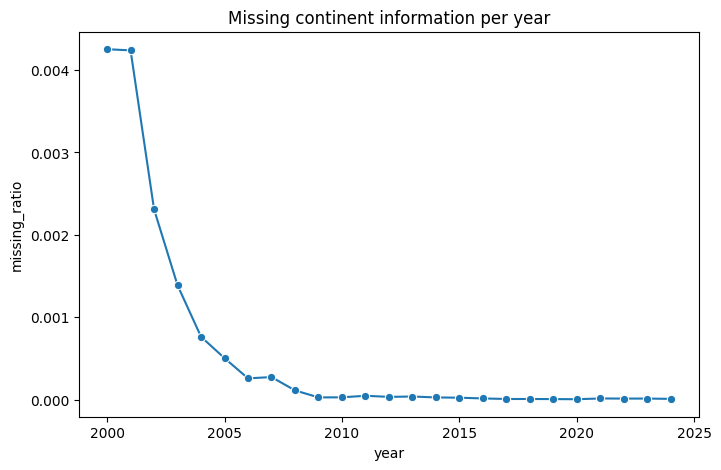

In [143]:
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=missing_arrivals_by_continent_df, x="year", y="missing_ratio", ax=ax, marker="o")
ax.set_title("Missing continent information per year")
plt.show()

In [123]:
missing_arrivals_by_country_df = calculate_missing_data_over_time(
    df = df,
    group_column="year",
    filter_column="country",
    filter_value=missing_country_cats,
    value_column="arrivals"
)

missing_arrivals_by_country_df["missing_ratio"] = missing_arrivals_by_country_df["arrivals_filtered"] / missing_arrivals_by_country_df["arrivals_total"]

missing_arrivals_by_country_df.tail()

,year,arrivals_total,arrivals_filtered,missing_ratio
20,2020,2146435.0,5746.0,0.002677
21,2021,745871.0,4697.0,0.006297
22,2022,3630031.0,17690.0,0.004873
23,2023,5908341.0,26013.0,0.004403
24,2024,6773619.0,29956.0,0.004422


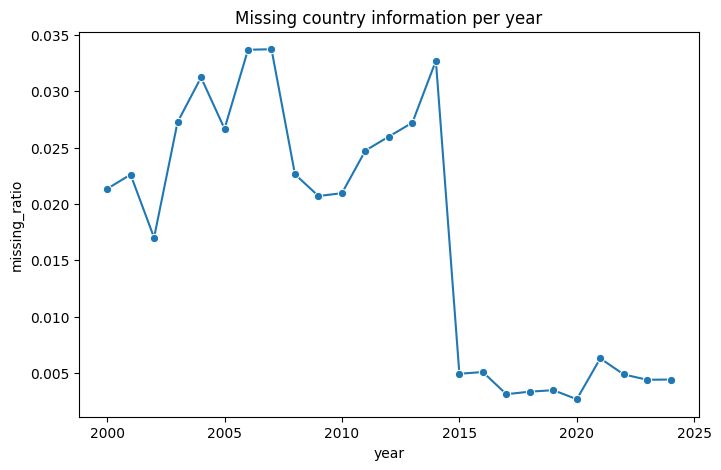

In [141]:
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=missing_arrivals_by_country_df, x="year", y="missing_ratio", ax=ax, marker="o")
ax.set_title("Missing country information per year")
plt.show()

#### Country and Continent conclusions
* For the last (~5) few years, missing residence continent data is virtually 0, so we should be able to ignore these.
* Given the same time frame, ~0.5% of the arrivals have unavailable information for country of residence.  

Using only the continent level seems to be more reasonable.

### State

In [133]:
df["state"].unique()

array(['Acre', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal',
       'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraná',
       'Pernambuco', 'Rio de Janeiro', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Roraima', 'Santa Catarina', 'São Paulo',
       'Outras Unidades da Federação'], dtype=object)

In [139]:
missing_arrivals_by_state_df = calculate_missing_data_over_time(
    df = df,
    group_column="year",
    filter_column="state",
    filter_value=["Outras Unidades da Federação"],
    value_column="arrivals"
)

missing_arrivals_by_state_df["missing_ratio"] = missing_arrivals_by_state_df["arrivals_filtered"] / missing_arrivals_by_state_df["arrivals_total"]

missing_arrivals_by_state_df.tail()

,year,arrivals_total,arrivals_filtered,missing_ratio
20,2020,2146435.0,3919.0,0.001826
21,2021,745871.0,2044.0,0.002740
22,2022,3630031.0,6950.0,0.001915
23,2023,5908341.0,15304.0,0.002590
24,2024,6773619.0,22473.0,0.003318


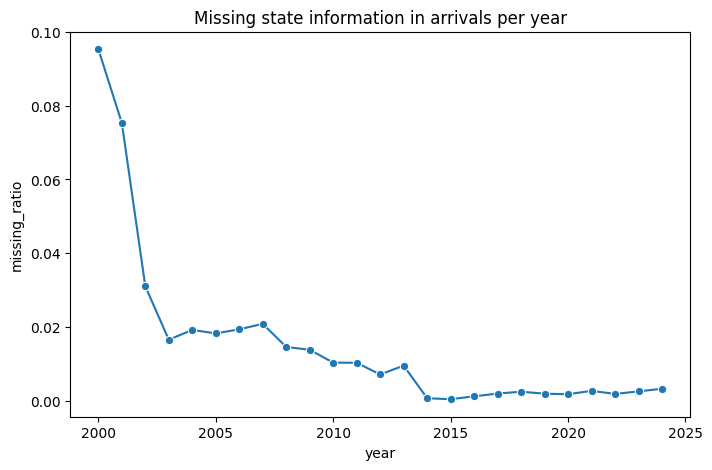

In [142]:
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=missing_arrivals_by_state_df, x="year", y="missing_ratio", ax=ax, marker="o")
ax.set_title("Missing state information in arrivals per year")
plt.show()

#### Conclusions about state data
For recent years (~5) the fraction of missing state information in arrivals floats around 0.25 % and its more or less stable, which should not impact any usage on the time series modeling.

### Entry route

It seems to be an inconsistance in naming conventions of maritime and air entry route data.

In [144]:
df["entry_route"].unique()

array(['Terrestre', 'Fluvial', 'Aérea', 'Marítima', 'Aéreo', 'Marítimo'],
      dtype=object)

In [169]:
entry_route_df = df.groupby(["year","entry_route"]).size().reset_index()
entry_route_df = entry_route_df.rename(columns={0:"rows"})
entry_route_df

,year,entry_route,rows
0,2000,Aérea,6468
1,2000,Fluvial,2940
2,2000,Marítima,4704
3,2000,Terrestre,3528
4,2001,Aérea,6468
...,...,...,...
95,2023,Terrestre,11017
96,2024,Aérea,13056
97,2024,Fluvial,676
98,2024,Marítima,2174


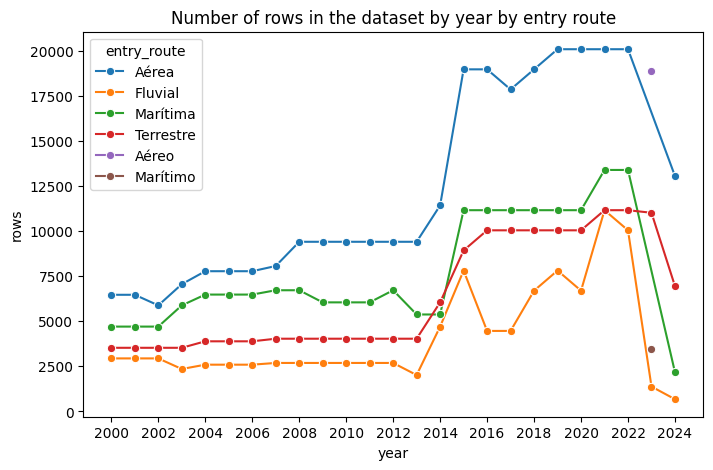

In [178]:
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=entry_route_df, x="year", y="rows", hue="entry_route", marker="o",ax=ax)
ax.set_xticks(np.arange(start=2000, stop=2025, step=2))
ax.set_title("Number of rows in the dataset by year by entry route")

plt.show()


#### Conclusions about entry route data
The year of 2023 is the only with inconsistent naming convention. Aéreo and Marítimo should be replaced by Aérea and Marítima.

### Months

In [179]:
df["month"].unique()

array(['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho',
       'agosto', 'setembro', 'outubro', 'novembro', 'dezembro', 'Janeiro',
       'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto',
       'Setembro', 'Outubro', 'Novembro', 'Dezembro', 'Marco'],
      dtype=object)

Clearly there is a problem, but it should be fine if we normalize the data.

In [180]:
df["month_id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Or we should be able to use the month id.

In [181]:
df["month_id"].value_counts()

month_id
12    65817
11    65479
10    64913
4     63257
1     63106
2     63084
3     63072
9     62864
7     62804
8     62797
5     62722
6     62657
Name: count, dtype: int64

In [187]:
df[(df["state"]=="Rio de Janeiro") & (df["country"] == "Argentina")]["month_id"].value_counts().sort_values(ascending=False) # Too many decembers. Why?

month_id
12    56
2     54
11    54
1     53
10    53
4     53
3     52
5     52
6     52
8     50
7     49
9     49
Name: count, dtype: int64

In [195]:
df[(df["state"]=="Rio de Janeiro") & (df["country"] == "Argentina")].to_excel("teste.xlsx")

Further analysis identified that there are "repeated rows" on the raw data, with different values.
E.g.: Arrivals in rio de janeiro from argentina on january 2024 by maritime entry route: there is a row with 984 arrivals, and other row with 9203 arrivals.

We probably should sum them.

It seems though that we can't rely on row counting to guarantee data quality.

## Final Remarks
**When creating the data cleaning / pre-processing pipeline, we should:**
* Normalize column names and apply the synonyms to the desired schema, like it was done in this notebook.
* Normalize state names (because why not?)
* Create a datetime column that joins year and month_id columns.
* Adjust entry_route names for the year or 2023 (or just use the id).

**In order to build the time series modeing:**
* It seems to be reasonable to not use country data, since it is more prone to inconsistencies.
* Therefore, the time series levels could be: Entry route, state and continent of origin. Not necessairly all of them. I should speak with my director.

Also, there are weird cases of duplicate rows, with different arrivals values. We should evaluate if this means that the Dataset is garbage or not. (e.g.: Same month (january), same year (2024), same entry route (maritime), same state (Rio de Janeiro), and different arrivals number in two rows). Since there is no metadata available, i don't know what to do. We might just assume that it is some entry error, and, therefore, we could sum everything.